In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings



In [2]:
df=pd.read_csv('C:\datascience\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variables 

In [3]:
x= df.drop(columns=['math score'],axis=1)

In [4]:
y=df['math score']

In [5]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer= OneHotEncoder()
preprocessor = ColumnTransformer(
    [ 
        ('OneHotEncoder',ohe_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)

])

In [6]:
x= preprocessor.fit_transform(x)

In [7]:
x.shape

(1000, 19)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an evaluate function to give all metrics after model training

In [9]:
def eval_func(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scr= r2_score(true,predicted)
    return mae,rmse,r2_scr


In [10]:
models = {
            "Lasso": Lasso(),
            "KNeighborsRegressor": KNeighborsRegressor(),
            "DecisionTreeRegressor": DecisionTreeRegressor(),
            "RandomForestRegressor": RandomForestRegressor(), 
            "AdaBoostClassifier": AdaBoostClassifier(),
            "SVR": SVR(),
            "LinearRegression": LinearRegression(),
            "Ridge":Ridge(),
            "Lasso": Lasso(),
            "CatBoostRegressor": CatBoostRegressor(verbose=False),
            "XGBRegressor": XGBRegressor()
}
model_List =[]
r2_List =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Train model
    model.fit(X_train,Y_train)
    #Make predictions
    y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    #Evaluate train and test dataset
    mae_train, rmse_train, r2_score_train = eval_func(Y_train,y_train_pred)
    mae_test, rmse_test, r2_score_test = eval_func(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_List.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root mean squared error :{:.4f}".format(rmse_train))
    print("- Mean absolute error :{:.4f}".format(mae_train))
    print("- R2 score :{:.4f} ".format(r2_score_train))

    print("---------------------------------------------")

    print("Model performance for testing set")
    print("- Root mean squared error :{:.4f}".format(rmse_test))
    print("- Mean absolute error :{:.4f}".format(mae_test))
    print("- R2 score :{:.4f}".format(r2_score_test))
    r2_List.append(r2_score_test)
    
    print('-------------------------------------------------')
    print("\n")








Lasso
Model performance for training set
- Root mean squared error :6.5938
- Mean absolute error :5.2063
- R2 score :0.8071 
---------------------------------------------
Model performance for testing set
- Root mean squared error :6.5197
- Mean absolute error :5.1579
- R2 score :0.8253
-------------------------------------------------




c:\datascience\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\datascience\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\datascience\venv\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\datascience\venv\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\datascience\venv\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


KNeighborsRegressor
Model performance for training set
- Root mean squared error :5.7066
- Mean absolute error :4.5137
- R2 score :0.8556 
---------------------------------------------
Model performance for testing set
- Root mean squared error :7.2530
- Mean absolute error :5.6210
- R2 score :0.7838
-------------------------------------------------


DecisionTreeRegressor
Model performance for training set
- Root mean squared error :0.2795
- Mean absolute error :0.0187
- R2 score :0.9997 
---------------------------------------------
Model performance for testing set
- Root mean squared error :7.6125
- Mean absolute error :6.0900
- R2 score :0.7619
-------------------------------------------------


RandomForestRegressor
Model performance for training set
- Root mean squared error :2.2597
- Mean absolute error :1.8113
- R2 score :0.9774 
---------------------------------------------
Model performance for testing set
- Root mean squared error :6.0900
- Mean absolute error :4.6658
- R2 

# Results

In [11]:
pd.DataFrame(list(zip(model_List,r2_List)),columns=['Models','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Models,R2 score
7,Ridge,0.880593
6,LinearRegression,0.879932
8,CatBoostRegressor,0.851632
3,RandomForestRegressor,0.847587
9,XGBRegressor,0.827797
0,Lasso,0.825320
1,KNeighborsRegressor,0.783813
2,DecisionTreeRegressor,0.761854
5,SVR,0.728600
4,AdaBoostClassifier,0.213749


# Linear Regression

In [12]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)
score=r2_score(Y_test,y_pred)*100
print("Accuracy of the model : %.2f" %score)



Accuracy of the model : 87.99


# Plot Y_pred Y_test 

Text(0, 0.5, 'predicted value')

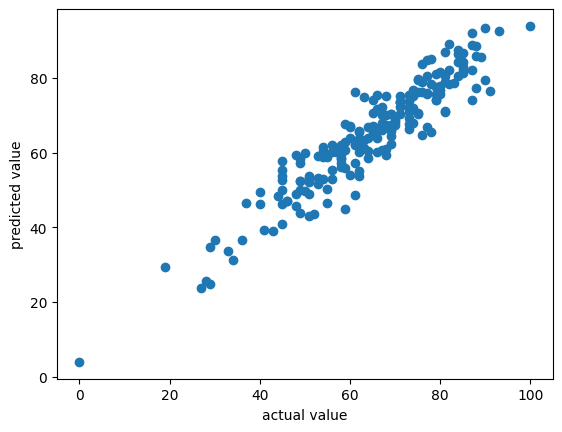

In [13]:
plt.scatter(Y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')

<Axes: xlabel='math score'>

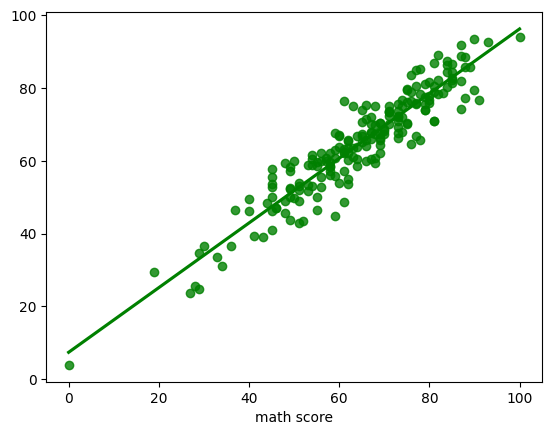

In [14]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='green')

# Difference between Y_test y_pred

In [15]:
pred= pd.DataFrame({'Actual value':Y_test, 'Predicted value' :y_pred, 'Difference':Y_test-y_pred })
pred.head(10)

,Actual value,Predicted value,Difference
521,91,76.625000,14.375000
737,53,58.984375,-5.984375
740,80,76.679688,3.320312
660,74,76.812500,-2.812500
411,84,87.507812,-3.507812
678,81,78.851562,2.148438
626,69,64.445312,4.554688
513,54,53.039062,0.960938
859,87,74.132812,12.867188
136,51,48.929688,2.070312
